In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from matplotlib import rcParams,font_manager
from matplotlib.ticker import FormatStrFormatter
import string

%load_ext autoreload
%autoreload 2

In [4]:
rcParams['figure.figsize'] = (6,6) #figure size in inches
rcParams['font.family'] = "sans-serif" 
rcParams['font.weight'] = "roman" 
rcParams['font.style'] = "normal" # not 100% sure what this does but it was recommended
rcParams['font.size'] = 32 # not 100% sure what this does but it was recommended
rcParams['pdf.fonttype'] = 42
rcParams['axes.linewidth'] = 2 #thickness of the border
rcParams['xtick.major.width'] = rcParams['axes.linewidth'] # make sure line widths are consistent
rcParams['ytick.major.width'] = rcParams['axes.linewidth']
rcParams['axes.spines.right'] = False #hides right border
rcParams['axes.spines.top'] = False #hides top
rcParams['legend.frameon'] = False #hides box around the legend
rcParams['legend.fontsize'] = 18 #font size in pt
rcParams['axes.labelsize'] = 32 
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = rcParams['xtick.labelsize']
rcParams['lines.linewidth'] = 3
rcParams['xtick.major.size'] = 5
rcParams['lines.markersize'] = 16
rcParams['ytick.major.size'] = rcParams['xtick.major.size'] 

In [5]:
direc = 'C:/Users/svo/Google Drive/Bas Games/Analysis/'
fig_direc = 'C:/Users/svo/Google Drive/Bas Games/Figures/'

In [6]:
S = np.loadtxt(direc + 'Summary Stats/summary_stats_hvh_final.txt')

In [7]:
name = ['dist_to_center','dist_to_self','dist_to_opp','dist_to_cm_self','dist_to_cm_opp',
        'neighbours_self','neighbours_opp','threats_made','threats_defended',
        'threats_executed']

stat_names = ['Distance to\n board center','Average distance\nto own pieces',
              'Average distance to\nopponent\'s pieces',
              'Distance to own\ncenter-of-mass',
              'Distance to opponent\'s\ncenter-of-mass',
              'Number of own\nneighbouring pieces',
              'Number of opponent\'s\nneighbouring pieces',
              'Number of\nthreats made','Number of\nthreats defended',
              'Number of\nthreats executed']

ireal = [15,3,6,9,12,18,21,24,27,30]
imod = [16,4,7,10,13,19,22,25,28,31]
ichance = [17,5,8,11,14,20,23,26,29,32]

In [90]:
name[9]

'threats_executed'

In [8]:
def summ_hist(i,j):
    return np.bincount(S[:,i].astype(int),weights = S[:,j])/np.bincount(S[:,i].astype(int))

rho1 = [sts.pearsonr(summ_hist(0,ireal[i])-summ_hist(0,ichance[i]),
                 summ_hist(0,imod[i])-summ_hist(0,ichance[i]))[0] for i in range(len(name))]

rho2 = [sts.pearsonr(summ_hist(0,ireal[i]),
                 summ_hist(0,imod[i]))[0] for i in range(len(name))]

rho3 = [sts.pearsonr(summ_hist(0,ireal[i]),
                 summ_hist(0,ichance[i]))[0] for i in range(len(name))]


In [43]:
def plot_summary_by_npieces(i,legend,yticks=None):
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    ax.set_xlabel('Number of pieces')    
    ax.plot(summ_hist(1,ireal[i]),'-g',label='Data')
    ax.plot(summ_hist(1,imod[i]),'-',color='C0',label='Model')
    ax.plot(summ_hist(1,ichance[i]),'-.k',label='Random')
    ax.set_ylabel(stat_names[i])
    if legend:
        ax.legend()
    ax.set_xticks([0,35])
    if yticks:
        ax.set_yticks(yticks)
    fig.subplots_adjust(bottom=0.15,right=0.95,left=0.25,top=0.95)    
    fig.savefig(fig_direc + 'supp_fig_8' + string.ascii_uppercase[i] + '.pdf')
    plt.show()    


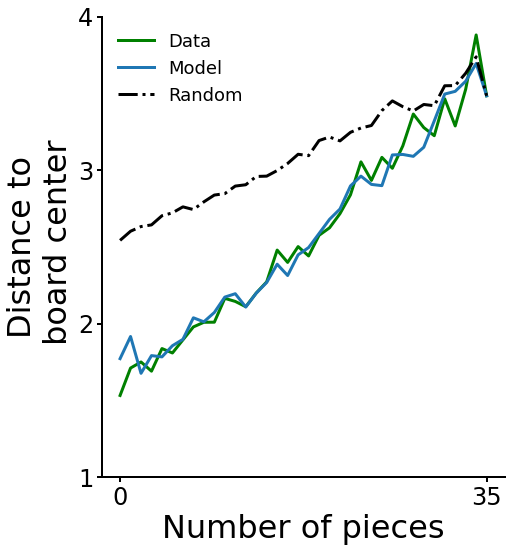

In [44]:
plot_summary_by_npieces(0,True,[1,2,3,4])

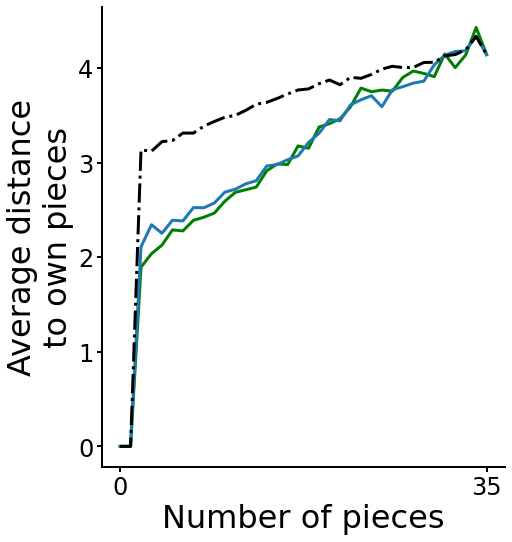

In [45]:
plot_summary_by_npieces(1,False)

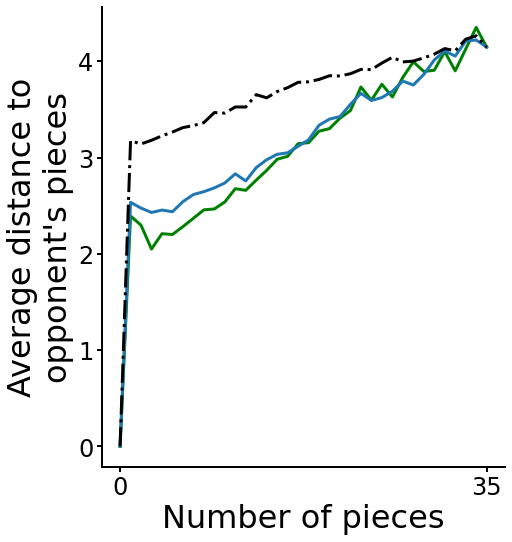

In [46]:
plot_summary_by_npieces(2,False)

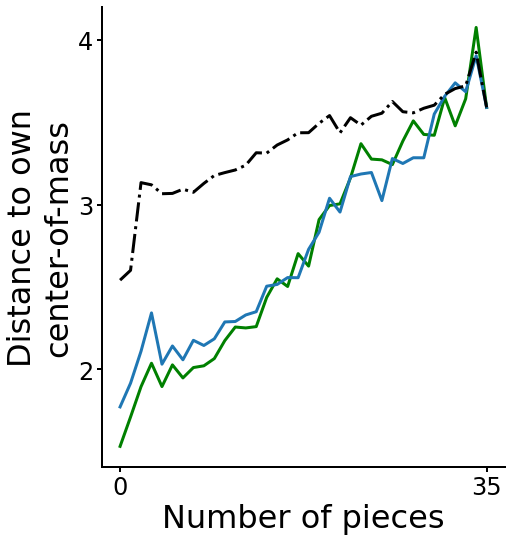

In [47]:
plot_summary_by_npieces(3,False,[2,3,4])

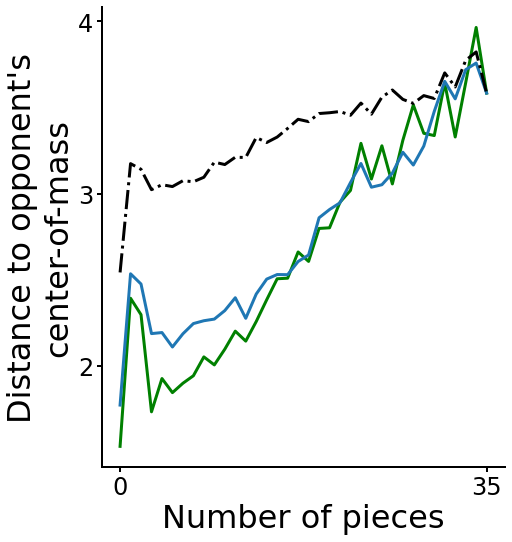

In [48]:
plot_summary_by_npieces(4,False,[2,3,4])

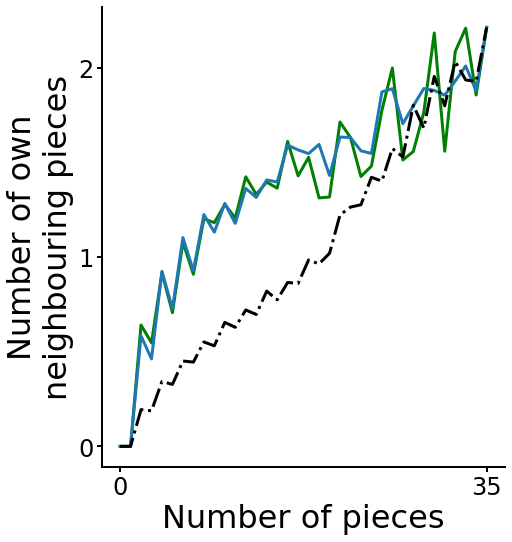

In [49]:
plot_summary_by_npieces(5,False,[0,1,2])

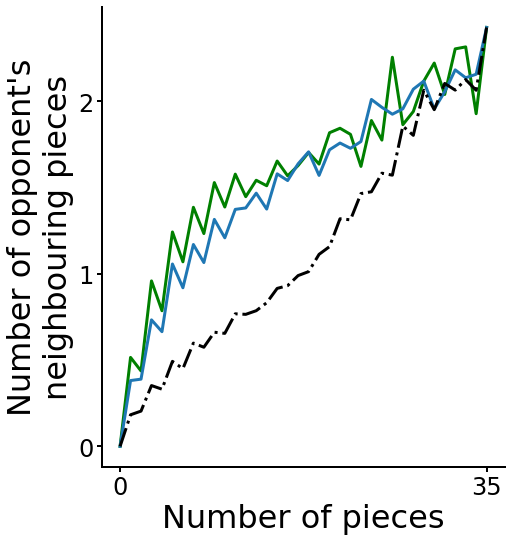

In [50]:
plot_summary_by_npieces(6,False,[0,1,2])

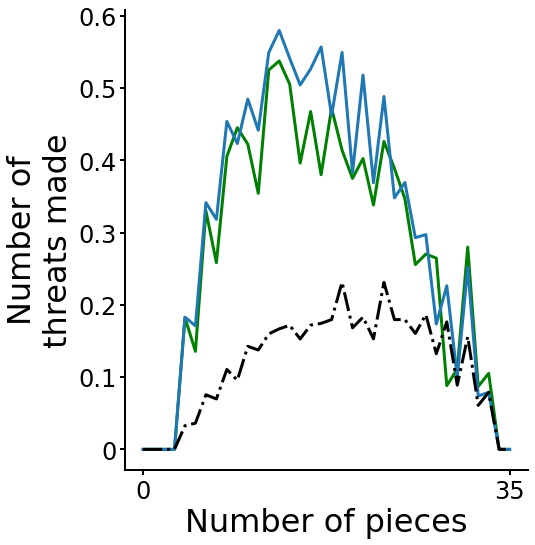

In [51]:
plot_summary_by_npieces(7,False)

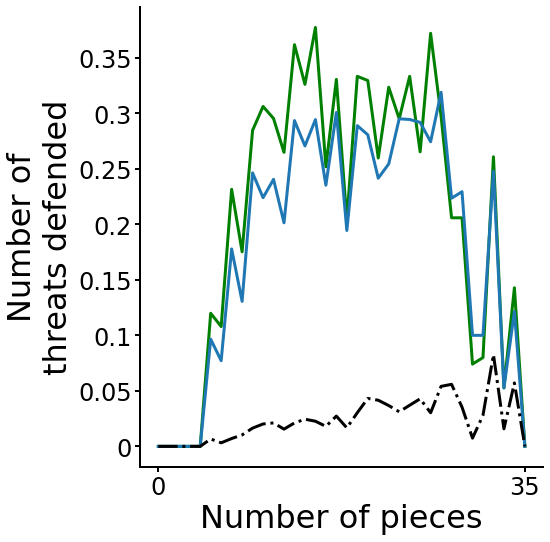

In [52]:
plot_summary_by_npieces(8,False)

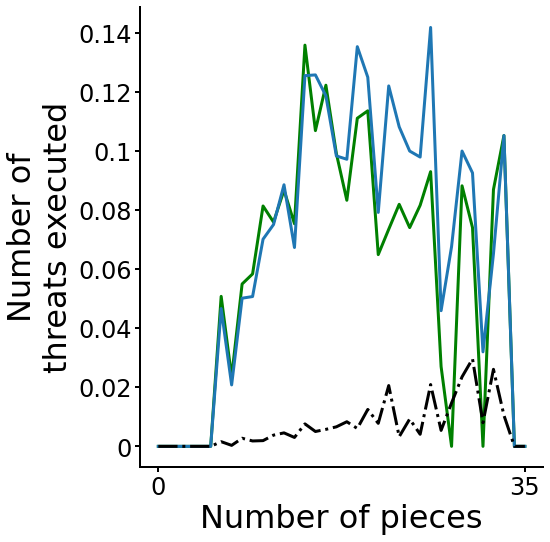

In [87]:
plot_summary_by_npieces(9,False)

In [99]:
np.sum(S[S[:,1]%2==0,ireal[9]])/10

150.0

In [101]:
np.sum(S[S[:,1]%2==1,ireal[9]])/10

116.0

In [102]:
np.sum(S[:,1]==0)/10

325.0

In [108]:
(np.sum(S[:,1]==0) - np.sum(S[S[:,1]%2==1,ireal[9]]) - np.sum(S[S[:,1]%2==1,ireal[9]]))/np.sum(S[:,1]==0)

0.28615384615384615

In [109]:
np.sum(S[S[:,1]%2==1,ireal[9]])/np.sum(S[:,1]==0)

0.3569230769230769

In [110]:
np.sum(S[S[:,1]%2==0,ireal[9]])/np.sum(S[:,1]==0)

0.46153846153846156

In [76]:
def plot_summary_sub(i):
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    
    ax.set_xlabel(stat_names[i])
    ax.set_ylabel(stat_names[i])
    Shuman = [np.mean(S[S[:,0]==n,ireal[i]]) for n in range(40)]
    Smodel = [np.mean(S[S[:,0]==n,imod[i]]) for n in range(40)]
    ax.plot(Smodel,Shuman,'.')
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    lim = np.min(np.vstack([xlim,ylim]),axis=0)
    
    ax.plot(lim,lim,linestyle='dashed',color='black')
    ax.set_ylim(lim)
    ax.set_xlim(lim)
    ax.text(0.85, 0.1,"$\\rho = " + str(sts.pearsonr(Shuman,Smodel)[0].round(2)) + "$",
            horizontalalignment='center',
            verticalalignment='center',
            transform = ax.transAxes,usetex=True)
    fig.subplots_adjust(bottom=0.2,right=0.95,left=0.25,top=0.95)    
    fig.savefig(fig_direc + 'supp_fig_9' + string.ascii_uppercase[i] + '.pdf')
    #fig.savefig(fig_direc + 'summary_npieces_' + letter + '.pdf')
    print(sts.pearsonr(Shuman,Smodel))
    plt.show()    


(0.8756122166803862, 1.4260274894758151e-13)


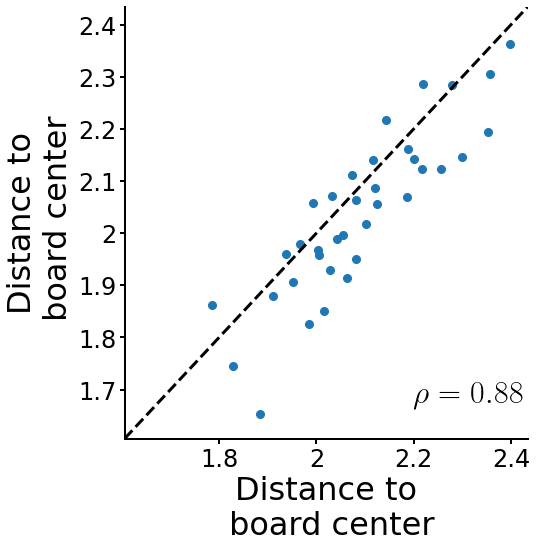

In [77]:
plot_summary_sub(0)

(0.9403838577241741, 2.168980750204394e-19)


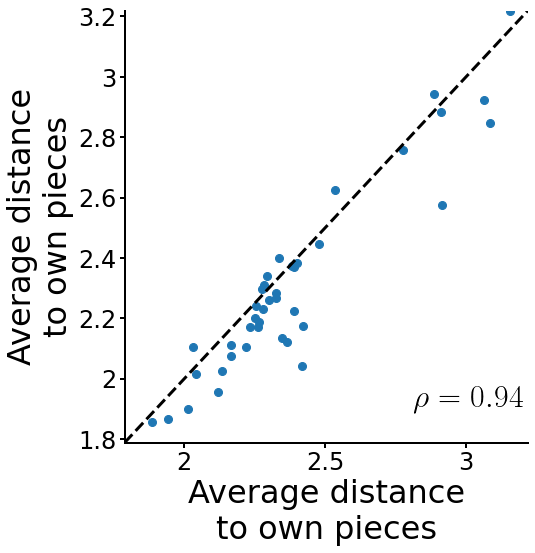

In [78]:
plot_summary_sub(1)

(0.9036151852909675, 1.4420071724953675e-15)


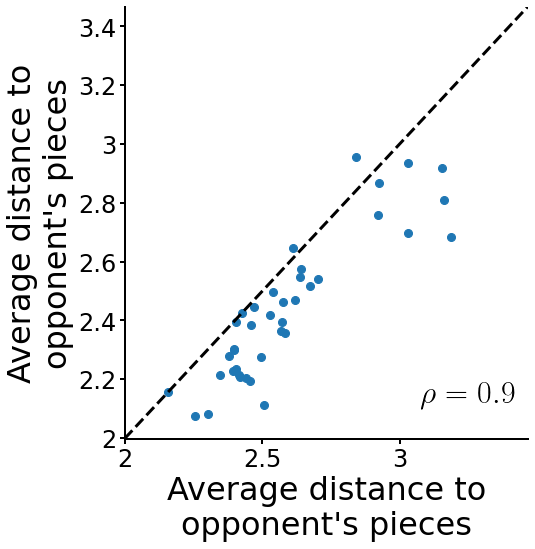

In [79]:
plot_summary_sub(2)

(0.8947522613408199, 7.085356218061779e-15)


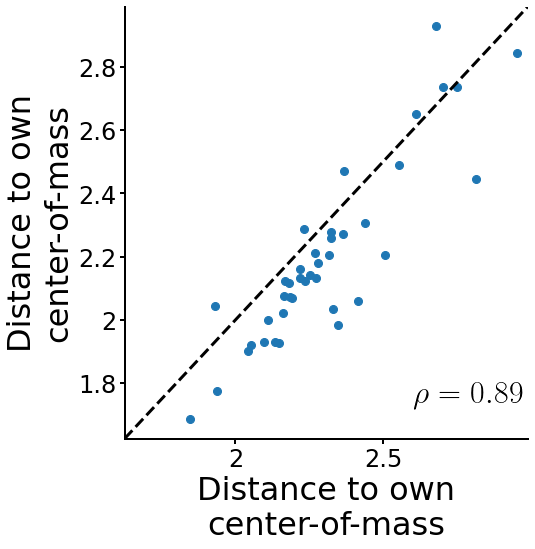

In [80]:
plot_summary_sub(3)

(0.8523463328004679, 2.9987275661059904e-12)


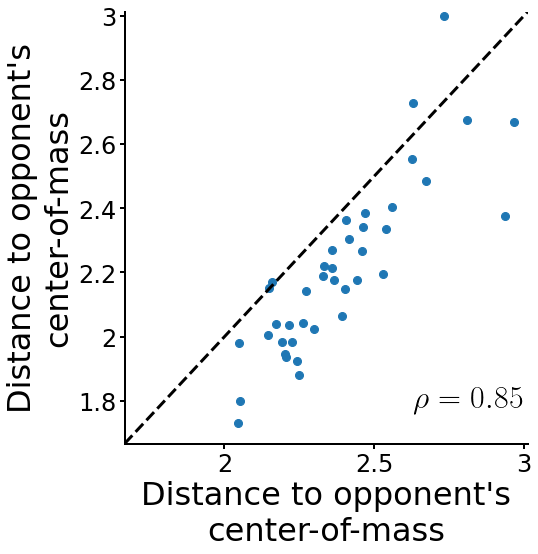

In [81]:
plot_summary_sub(4)

(0.5847817643094705, 7.412273968285862e-05)


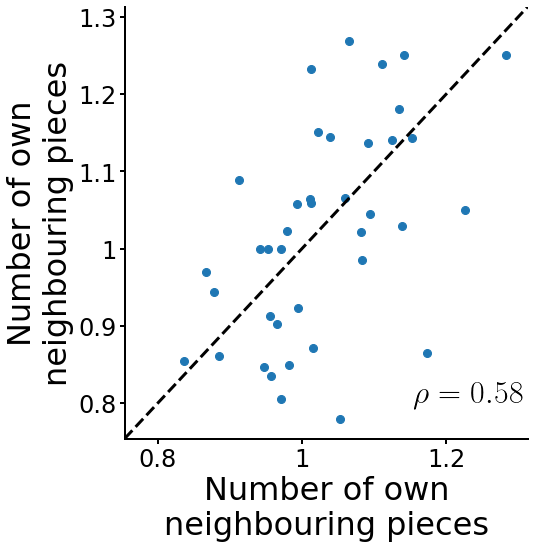

In [82]:
plot_summary_sub(5)

(0.8258485128591531, 5.405154222689266e-11)


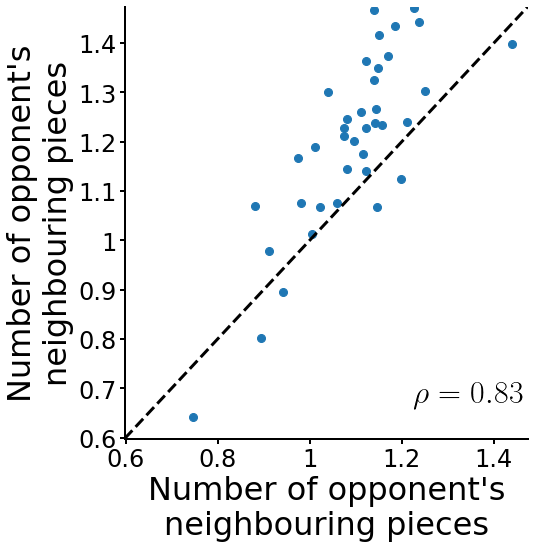

In [83]:
plot_summary_sub(6)

(0.7236945084349249, 1.3164105808088374e-07)


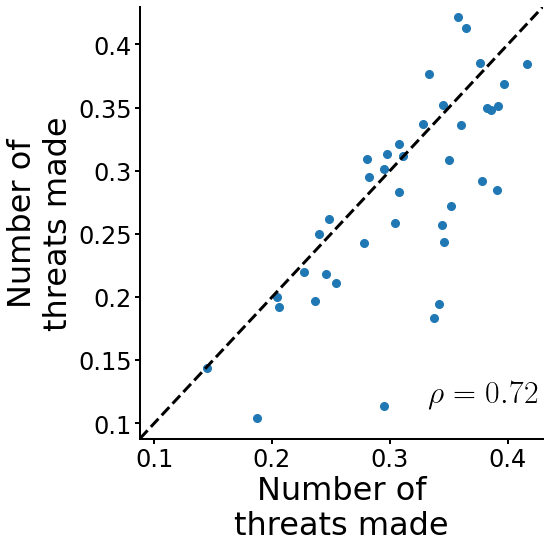

In [84]:
plot_summary_sub(7)

(0.8923594746778016, 1.0629784731518255e-14)


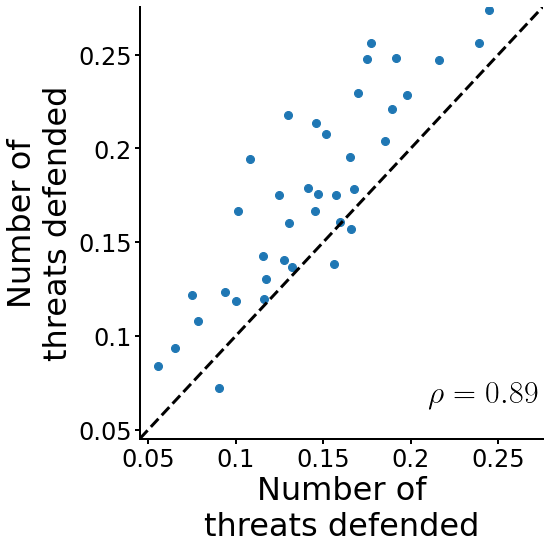

In [85]:
plot_summary_sub(8)

(0.9340197058308709, 1.4089266824204877e-18)


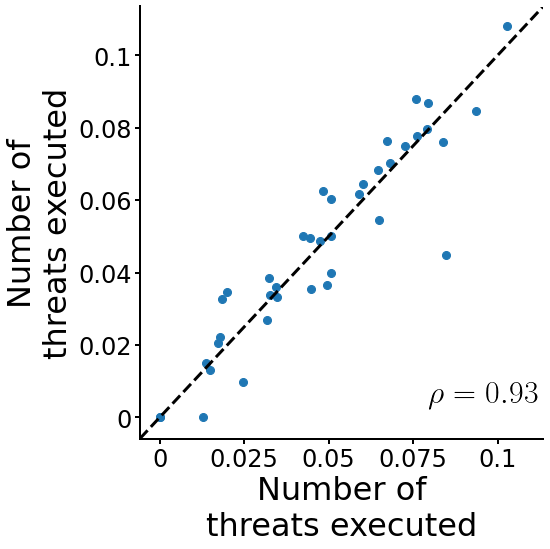

In [86]:
plot_summary_sub(9)